## Notebook specific deps

In [1]:
!uv pip install kagglehub seaborn scikit-learn imblearn safetensors jupyter

Audited 6 packages in 21ms


## Download the dataset

In [2]:
import shutil
import kagglehub
from pathlib import Path

DATASET_PATH = Path("./dataset/pima-indians-diabetes-database")

if not DATASET_PATH.exists():
    # Download latest version
    path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
    shutil.move(path, DATASET_PATH)
else:
    print(f"{DATASET_PATH} exists")

dataset/pima-indians-diabetes-database exists


## Dataset Understanding

In [3]:
import pandas as pd

column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'y']
df_diabetes = pd.read_csv(DATASET_PATH / "diabetes.csv", header=0, names=column_names)

In [4]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   y                         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,y
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: title={'center': 'y'}>]],
      dtype=object)

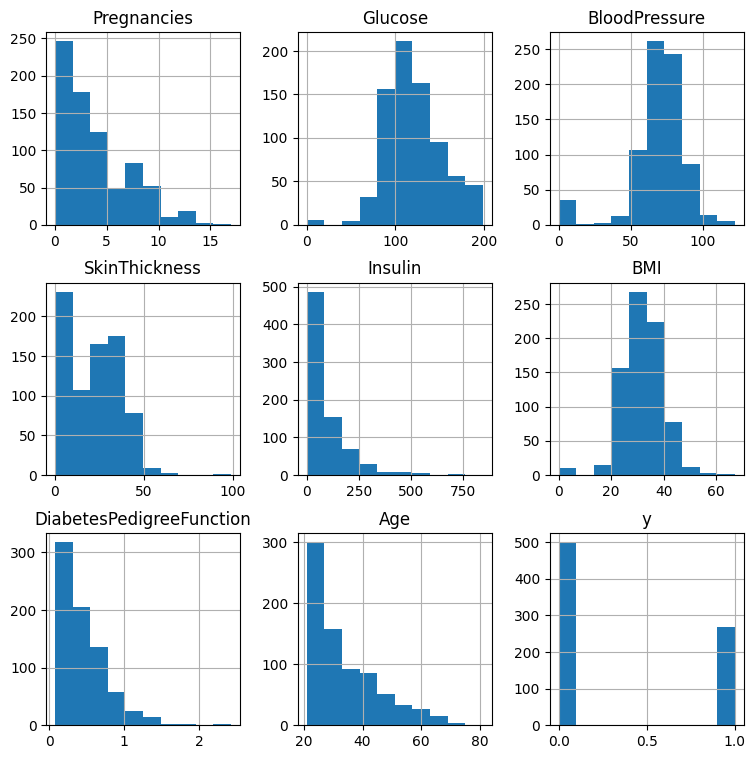

In [6]:
df_diabetes.hist(figsize=(9, 9))

#### Target value counts

In [7]:
df_diabetes['y'].value_counts()

y
0    500
1    268
Name: count, dtype: int64

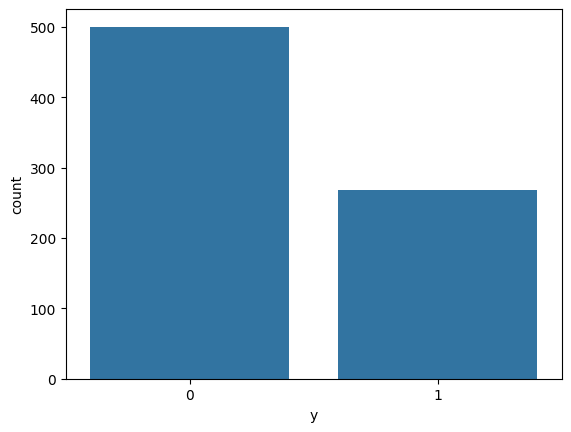

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='y', data=df_diabetes)
plt.show()

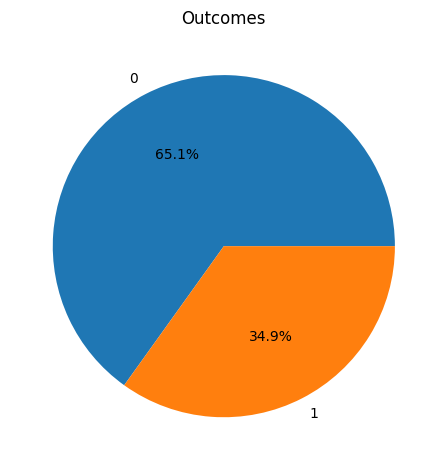

In [9]:
#df_diabetes['y'].value_counts().plot(kind='pie')
plt.pie(df_diabetes['y'].value_counts().tolist(), labels=['0', '1'], autopct='%1.1f%%')

plt.title("Outcomes")
plt.tight_layout()

plt.show()

#### Diabetes % by age range

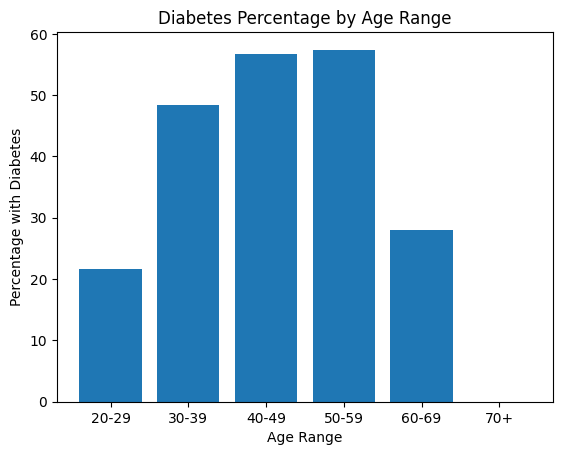

In [10]:
# Define Age ranges
age_bins = [20, 30, 40, 50, 60, 70, 80]  # Adjust the age ranges as needed
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']

#Use the pd.cut function to categorize ages into age ranges:
df_diabetes['AgeRange'] = pd.cut(df_diabetes['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

#Group the data by age range and calculate the percentage of diabetes cases (Diabetes=1):
age_diabetes = df_diabetes.groupby('AgeRange', observed=True)['y'].mean() * 100

#Plot the data:
plt.bar(age_diabetes.index, age_diabetes)
plt.xlabel("Age Range")
plt.ylabel("Percentage with Diabetes")
plt.title("Diabetes Percentage by Age Range")
plt.show()

#### BMI vs. Diabetes

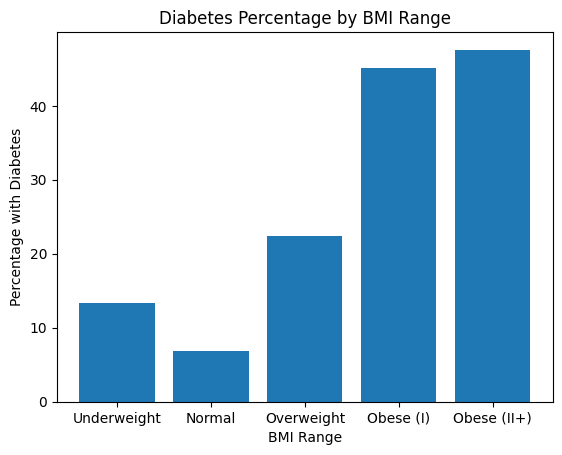

In [11]:
# Define BMI ranges
bmi_ranges = [0, 18.5, 24.9, 29.9, 34.9, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese (I)', 'Obese (II+)']

#Use the pd.cut function to categorize ages into age ranges:
df_diabetes['BMIRange'] = pd.cut(df_diabetes['BMI'], bins=bmi_ranges, labels=bmi_labels, include_lowest=True)

#Group the data by age range and calculate the percentage of diabetes cases (Diabetes=1):
bmi_diabetes = df_diabetes.groupby('BMIRange', observed=True)['y'].mean() * 100

#Plot the data:
plt.bar(bmi_diabetes.index, bmi_diabetes)
plt.xlabel("BMI Range")
plt.ylabel("Percentage with Diabetes")
plt.title("Diabetes Percentage by BMI Range")
plt.show()

#### Glucose vs Diabetes

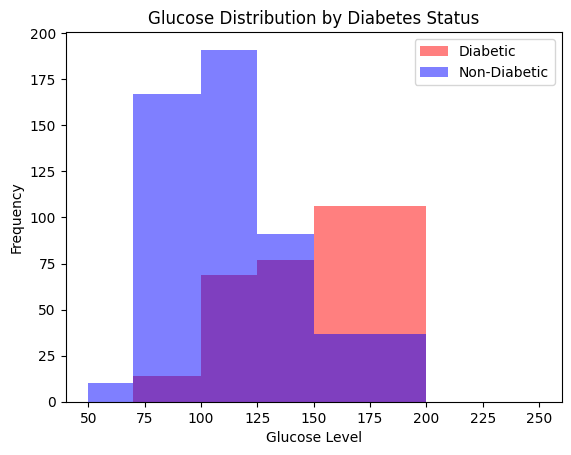

In [12]:
#Create two separate data series for diabetic and non-diabetic patients:
glucose_diabetic = df_diabetes[df_diabetes['y'] == 1]['Glucose']

glucose_non_diabetic = df_diabetes[df_diabetes['y'] == 0]['Glucose']
# Define the bins (ranges) for the histogram
bins = [50, 70, 100, 125, 150, 200, 250]

# Plot histogram for diabetic patients
plt.hist(glucose_diabetic, bins=bins, alpha=0.5, label='Diabetic', color='red')

# Plot histogram for non-diabetic patients
plt.hist(glucose_non_diabetic, bins=bins, alpha=0.5, label='Non-Diabetic', color='blue')

# Labeling and legend
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.title('Glucose Distribution by Diabetes Status')
plt.legend()

# Show the plot
plt.show()

## Data Cleaning

In [13]:
# Missing value percentage checking
missing_percentage = (df_diabetes.isnull().sum() / len(df_diabetes)) * 100

# Show the missing percentage
print(missing_percentage)

Pregnancies                 0.000000
Glucose                     0.000000
BloodPressure               0.000000
SkinThickness               0.000000
Insulin                     0.000000
BMI                         0.000000
DiabetesPedigreeFunction    0.000000
Age                         0.000000
y                           0.000000
AgeRange                    0.130208
BMIRange                    0.000000
dtype: float64


#### Drop zero values

In [14]:
# Exclude the 'y' column from the selection
numeric_columns = df_diabetes.select_dtypes(include=['number']).drop(columns=['y'])

# Count the number of zeros in each selected column
zero_counts = numeric_columns.eq(0).sum()

# Print the columns with zero counts
print("Columns with zero values and their counts (excluding 'y'):")
print(zero_counts[zero_counts > 0])

Columns with zero values and their counts (excluding 'y'):
Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


Since `SkinThickness` and `Insulin` has many zeros, we drop them

In [15]:
columns_to_drop = ['SkinThickness', 'Insulin', 'AgeRange', 'BMIRange']
df_new = df_diabetes.drop(columns_to_drop, axis=1)

In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   BMI                       768 non-null    float64
 4   DiabetesPedigreeFunction  768 non-null    float64
 5   Age                       768 non-null    int64  
 6   y                         768 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 42.1 KB


In [17]:
df_new

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,y
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101,76,32.9,0.171,63,0
764,2,122,70,36.8,0.340,27,0
765,5,121,72,26.2,0.245,30,0
766,1,126,60,30.1,0.349,47,1


#### Treating the zero values in the rest of the columns

We will replace the 0 values with mean / median value

In [18]:
# Calculate the skewness for all numerical columns
skewness = df_new.skew()

# Print the skewness values
print(skewness)

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
y                           0.635017
dtype: float64


In [19]:
# Calculate mean and median (excluding zeros)
mean_glucose = df_new[df_new['Glucose'] != 0]['Glucose'].mean()
median_bmi = df_new[df_new['BMI'] != 0]['BMI'].median()
median_bp = df_new[df_new['BloodPressure'] != 0]['BloodPressure'].median()

In [20]:
# Replace zeros across multiple columns at once
df_new.replace({
    'Glucose': {0: mean_glucose},
    'BMI': {0: median_bmi},
    'BloodPressure': {0: median_bp}
}, inplace=True)

In [21]:
# Exclude the 'y' column from the selection
numeric_columns = df_new.select_dtypes(include=['number']).drop(columns=['y'])

# Count the number of zeros in each selected column
zero_counts = numeric_columns.eq(0).sum()

# Print the columns with zero counts
print("Columns with zero values and their counts (excluding 'y'):")
print(zero_counts[zero_counts > 0])

Columns with zero values and their counts (excluding 'y'):
Pregnancies    111
dtype: int64


## Train - Test Data Split and Processing

In [22]:
df_new

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,y
0,6,148.0,72,33.6,0.627,50,1
1,1,85.0,66,26.6,0.351,31,0
2,8,183.0,64,23.3,0.672,32,1
3,1,89.0,66,28.1,0.167,21,0
4,0,137.0,40,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101.0,76,32.9,0.171,63,0
764,2,122.0,70,36.8,0.340,27,0
765,5,121.0,72,26.2,0.245,30,0
766,1,126.0,60,30.1,0.349,47,1


In [23]:
features = df_new.values[:,:6]
print(features.shape)

(768, 6)


In [24]:
labels = df_new.values[:,6:]
print(labels.shape)

(768, 1)


In [25]:
# Split your dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    random_state=95)

In [26]:
print(f"{X_train.shape = }, {y_train.shape = }")
print(f"{X_test.shape = }, {y_test.shape = }")

X_train.shape = (614, 6), y_train.shape = (614, 1)
X_test.shape = (154, 6), y_test.shape = (154, 1)


#### Apply SMOTE to the training data

SMOTE is a statistical technique for dealing with imbalanced datasets, since we have an imbalance between diabetic and non-diabetic cases (~35% vs ~65% as shown in the pie chart). What SMOTE does:
- Identifies minority class samples: In this case, patients with diabetes (class 1)
- Creates synthetic examples: Instead of simply duplicating minority samples, SMOTE:
    - Selects a minority class sample
    - Finds its k-nearest neighbors (other minority samples)
    - Generates new synthetic samples along the lines connecting the sample and its neighbors
    - Balances the dataset: The resulting training data (`X_train_resampled`, `y_train_resampled`) has equal representation of both classes

In [27]:
import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"{X_train_resampled.shape = }, {y_train_resampled.shape = }")

X_train_resampled.shape = (800, 6), y_train_resampled.shape = (800,)


In [28]:
import numpy as np

num_ones = np.sum(y_train_resampled == 1)
num_zeros = np.sum(y_train_resampled == 0)

print(f"Number of 1s: {num_ones}")
print(f"Number of 0s: {num_zeros}")

Number of 1s: 400
Number of 0s: 400


#### Scale the data
Transforms each feature (column) using: `(x - mean) / std_dev`  
Benefits:
- Equalizes feature scales: Features like Glucose (70-200) and Pregnancies (0-17) are brought to the same scale
- Improves neural network performance: The model won't be biased toward features with larger values
- Speeds up gradient descent: Optimization converges faster with standardized data
- Reduces sensitivity to outliers: Using unit variance makes the model more robust

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [30]:
print(f"{X_train_resampled.shape = }, {y_train_resampled.shape = }")
print(f"{X_test.shape = }, {y_test.shape = }")

X_train_resampled.shape = (800, 6), y_train_resampled.shape = (800,)
X_test.shape = (154, 6), y_test.shape = (154, 1)


## Model Training

In [31]:
from loguru import logger
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from safetensors.torch import save_file, load_file


In [32]:
def get_device():
    if torch.cuda.is_available():
        return torch.device("cuda")
    elif torch.backends.mps.is_available():
        return torch.device("mps")
    elif torch.backends.xla.is_available():
        return torch.device("xla")
    elif torch.backends.xpu.is_available():
        return torch.device("xpu")
    elif torch.backends.ipu.is_available():
        return torch.device("ipu")
    elif torch.backends.meta.is_available():
        return torch.device("meta")
    else:
        return torch.device("cpu")

DEVICE = get_device()
logger.info(f"Using device: {DEVICE}")

2025-05-09 17:31:47.980 | INFO     | __main__:<module>:18 - Using device: mps


#### DataLoader

In [33]:
# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_resampled)
y_train_tensor = torch.FloatTensor(y_train_resampled).reshape(-1, 1)  # Add this reshape
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).reshape(-1, 1)

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=len(test_dataset), shuffle=False)

#### Model Architecture

In [34]:
class Net(nn.Module):
    def __init__(self, input_dim=6):
        super(Net, self).__init__()
        # First layer with more units and batch normalization
        self.layer1 = nn.Sequential(
            nn.Linear(input_dim, 32),  # Increased from 20 to 32
            nn.BatchNorm1d(32),        # Added batch normalization
            nn.LeakyReLU(0.1),         # LeakyReLU instead of ReLU
            nn.Dropout(0.2)            # Increased dropout
        )
        
        # Second layer with more units
        self.layer2 = nn.Sequential(
            nn.Linear(32, 24),         # Increased from 14 to 24
            nn.BatchNorm1d(24),        # Added batch normalization
            nn.LeakyReLU(0.1),
            nn.Dropout(0.25)
        )
        
        # Third layer
        self.layer3 = nn.Sequential(
            nn.Linear(24, 16),         
            nn.BatchNorm1d(16),
            nn.LeakyReLU(0.1)
        )
        
        # Output layer
        self.output_layer = nn.Sequential(
            nn.Linear(16, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.output_layer(x)
        return x

# Initialize the improved model with weight decay
model = Net().to(DEVICE)
criterion = nn.BCELoss()

# Improved optimizer settings
optimizer = optim.Adam(
    model.parameters(), 
    lr=0.001,            # Increased learning rate from 0.0001
    weight_decay=0.0005  # Added L2 regularization
)

# Add learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, 
    mode='max', 
    factor=0.5, 
    patience=10, 
)

#### Train and Eval

In [35]:
Path("./weights").mkdir(parents=True, exist_ok=True)
WEIGHT_PATH = Path("./weights/local_training_diabetes_model.safetensors")

# Training function
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs = 100):
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    best_val_acc = 0.0
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        history['train_loss'].append(epoch_loss)
        history['train_acc'].append(epoch_acc)
        
        # Validation phase
        val_loss, val_acc = evaluate_model(model, test_loader, criterion)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        scheduler.step(val_acc)
        
        print(f'Epoch {epoch+1}/{epochs} | '
            f'Train Loss: {epoch_loss:.4f} | '
            f'Train Acc: {epoch_acc:.4f} | '
            f'Val Loss: {val_loss:.4f} | '
            f'Val Acc: {val_acc:.4f}')
        
        # Early stopping
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            save_file(model.state_dict(), WEIGHT_PATH)
            print(f'\n Find best model with val_acc {best_val_acc}. saved model to {WEIGHT_PATH}')
    
    return history

In [36]:
# Evaluation function
def evaluate_model(model, data_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item() * inputs.size(0)
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(data_loader.dataset)
    epoch_acc = correct / total
    
    return epoch_loss, epoch_acc

In [37]:
# Train the model
history = train_model(model, train_loader, test_loader, criterion, optimizer)


Epoch 1/100 | Train Loss: 0.6486 | Train Acc: 0.6175 | Val Loss: 0.5828 | Val Acc: 0.7597

 Find best model with val_acc 0.7597402597402597. saved model to weights/local_training_diabetes_model.safetensors
Epoch 2/100 | Train Loss: 0.5748 | Train Acc: 0.6863 | Val Loss: 0.5278 | Val Acc: 0.7727

 Find best model with val_acc 0.7727272727272727. saved model to weights/local_training_diabetes_model.safetensors
Epoch 3/100 | Train Loss: 0.5439 | Train Acc: 0.7275 | Val Loss: 0.4917 | Val Acc: 0.7922

 Find best model with val_acc 0.7922077922077922. saved model to weights/local_training_diabetes_model.safetensors
Epoch 4/100 | Train Loss: 0.5247 | Train Acc: 0.7512 | Val Loss: 0.5042 | Val Acc: 0.7987

 Find best model with val_acc 0.7987012987012987. saved model to weights/local_training_diabetes_model.safetensors
Epoch 5/100 | Train Loss: 0.5287 | Train Acc: 0.7300 | Val Loss: 0.5067 | Val Acc: 0.7792
Epoch 6/100 | Train Loss: 0.5214 | Train Acc: 0.7588 | Val Loss: 0.5192 | Val Acc: 0.7

In [40]:
# Create a new model instance
loaded_model = Net().to(DEVICE)

# Load the weights from SafeTensors file
loaded_model.load_state_dict(load_file(WEIGHT_PATH))

# Evaluate the loaded model
test_loss, test_acc = evaluate_model(loaded_model, test_loader, criterion)
print(f"Loaded model - Test loss: {test_loss:.4f}, Test accuracy: {test_acc*100:.2f}%")

Loaded model - Test loss: 0.4893, Test accuracy: 81.82%
